In [6]:
import rasterio as rio
from rasterio import warp
from rasterio import windows
from rasterio import features
from rasterio.crs import CRS
import pyproj

from matplotlib import pyplot
%matplotlib inline

import numpy as np

In [71]:
help(rio.crs)

Help on module rasterio.crs in rasterio:

NAME
    rasterio.crs

CLASSES
    rasterio._crs._CRS(collections.UserDict)
        CRS
    
    class CRS(rasterio._crs._CRS)
     |  A container class for coordinate reference system info
     |  
     |  PROJ.4 is the law of this land: http://proj.osgeo.org/. But whereas PROJ.4
     |  coordinate reference systems are described by strings of parameters such as
     |  
     |      +proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs
     |  
     |  here we use mappings:
     |  
     |      {'proj': 'longlat', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
     |  
     |  One can set/get any PROJ.4 parameter using a dict-like key/value pair on the
     |  object. You can instantiate the object by simply passing a dict to the
     |  constructor. E.g.
     |  
     |      crs = CRS({'init': 'epsg:3005'})
     |  
     |  Method resolution order:
     |      CRS
     |      rasterio._crs._CRS
     |      collections.UserDict
     |      co

In [59]:
#help(warp)

# src_crs = pyproj.Proj("+init=EPSG:4326")
# dst_crs = pyproj.Proj("+init=EPSG:3857")

# WGS84
src_crs = rio.crs.CRS({"init":"EPSG:4326"})
# WGS84 Web Mercator, used by Google Maps and OpenStreetMaps
dst_crs = rio.crs.CRS({"init":"EPSG:3857"})

src_width = 360
src_height = 180

# bounds = (left, bottom, right, top)
bounds = (0,180, 260, 0)

warp.calculate_default_transform(src_crs, dst_crs, src_width, src_height, *bounds)

(Affine(63835.73132234098, 0.0, 0.0,
       0.0, -64040.3330252972, 16213801.067583967),
 313,
 253)

1

In [57]:
from rasterio.warp import reproject



In [ ]:
# calculates the projected coordinates for a single point
lat = 100
lon = 80

# src_crs = pyproj.Proj("+init=EPSG:4326")
# dst_crs = pyproj.Proj("+init=EPSG:3857")
src_crs = rio.crs.CRS({"init":"EPSG:4326"})
dst_crs = rio.crs.CRS({"init":"EPSG:3857"})

pyproj.transform(pyproj.Proj(src_crs), pyproj.Proj(dst_crs), lat, lon)

In [16]:
#help(windows)

window = ((200,200), (200,200))

with rio.open("/Users/nathansuberi/Desktop/RW_Data/bio_012_1_amphib.tif") as src:
    print(src.profile)
    print(src.transform)
    print(windows.transform(window, src.transform))

{'driver': 'GTiff', 'dtype': 'int32', 'nodata': 0.0, 'width': 43200, 'height': 21600, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.00833330000000387, 0.0, -180.0,
       0.0, -0.00833330000000387, 89.99928000008359), 'bigtiff': 'no', 'compress': 'lzw', 'interleave': 'band', 'old_nodata': '2147483647.0', 'tiled': False}
| 0.01, 0.00,-180.00|
| 0.00,-0.01, 90.00|
| 0.00, 0.00, 1.00|
| 0.01, 0.00,-178.33|
| 0.00,-0.01, 88.33|
| 0.00, 0.00, 1.00|


In [18]:
file_name = "mag_4days_20171001"
out = "/Users/nathansuberi/Desktop/RW_Data/{}_edit.tif".format(file_name)

with rio.open("/Users/nathansuberi/Desktop/RW_Data/{}.png".format(file_name)) as src:
    print(src.profile)
    r, g, b, a = [src.read(ix) for ix in src.indexes]
    
# Is GTiff
# width*height*[[factor depending on dtype]] == how big file is
### can read into memory at once?
# Tried to run reprojection, kernel dies

# Already compressed
# Is tiled, with blocks
# Interleave = band
# CRS = merc... needs reprojecting

# How many bands are there? How many should be kept?

# Should this be done with the rio CLI or in python?

/Users/nathansuberi/.pyenv/versions/3.6.0/lib/python3.6/site-packages/rasterio/__init__.py:282: NotGeoreferencedWarning: Dataset has no geotransform set. Default transform will be applied (Affine.identity())
  s.start()


{'driver': 'PNG', 'dtype': 'uint8', 'nodata': None, 'width': 4000, 'height': 2000, 'count': 4, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'tiled': False, 'interleave': 'pixel'}


/Users/nathansuberi/.pyenv/versions/3.6.0/lib/python3.6/site-packages/rasterio/__init__.py:282: NotGeoreferencedWarning: Dataset has no geotransform set. Default transform will be applied (Affine.identity())
  s.start()


{'driver': 'PNG', 'dtype': 'uint8', 'nodata': None, 'width': 4000, 'height': 2000, 'count': 4, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'tiled': False, 'interleave': 'pixel'}
(array([  0,   8,  46,  56,  96, 126, 157, 193, 201, 247, 250, 255], dtype=uint8), array([31529504,    19809,    29519,    19809,    29519,    44078,
          44078,    48436,    19809,    29519,    44078,   141842]))


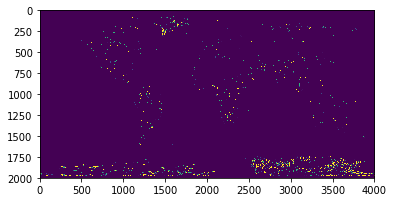

In [42]:
file_name = "mag_4days_20171001"
out = "/Users/nathansuberi/Desktop/RW_Data/{}_edit.tif".format(file_name)

with rio.open("/Users/nathansuberi/Desktop/RW_Data/{}.png".format(file_name)) as src:
    print(src.profile)
    data_png = src.read()
    
print(np.unique(data_png, return_counts=True))
pyplot.imshow(data_png[0])


In [28]:
file_name = "mag_signal_20171001_ALL"
out = "/Users/nathansuberi/Desktop/RW_Data/{}_edit.tif".format(file_name)

with rio.open("/Users/nathansuberi/Desktop/RW_Data/{}.tif".format(file_name)) as src:
    print(src.profile)
    data_tif = src.read()
    
# Is GTiff
# width*height*[[factor depending on dtype]] == how big file is
### can read into memory at once?
# Tried to run reprojection, kernel dies

# Already compressed
# Is tiled, with blocks
# Interleave = band
# CRS = merc... needs reprojecting

# How many bands are there? How many should be kept?

# Should this be done with the rio CLI or in python?

{'driver': 'GTiff', 'dtype': 'int32', 'nodata': -32000.0, 'width': 4000, 'height': 2000, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.09, 0.0, -180.049999,
       0.0, -0.09, 90.049999), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


(array([-32000, -15191, -14651, ...,  19979,  19997,  20000], dtype=int32), array([729469,      1,      1, ...,      1,      1,    225]))


TypeError: Invalid dimensions for image data

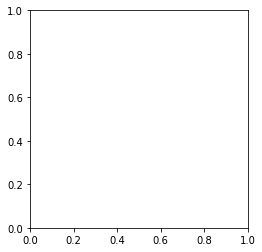

In [40]:
from matplotlib import pyplot
%matplotlib inline

# With tif
print(np.unique(data_tif, return_counts=True))
pyplot.imshow(data_tif)

In [ ]:
# With png
np.unique(b, return_counts=True)

In [45]:
from rasterio.warp import calculate_default_transform, reproject, Resampling

orig_files = [
    "test_clip",
#     "GHS_BUILT_LDS1975_GLOBE_R2016A_54009_250_v1_0",
#     "GHS_BUILT_LDS1990_GLOBE_R2016A_54009_250_v1_0",
#     "GHS_BUILT_LDS2000_GLOBE_R2016A_54009_250_v1_0",
#     "GHS_BUILT_LDS2014_GLOBE_R2016A_54009_250_v1_0"
]

for file_name in orig_files:

    out = "/Users/nathansuberi/Desktop/RW_Data/{}_edit.tif".format(file_name)

    with rio.open("/Users/nathansuberi/Desktop/RW_Data/{}.tif".format(file_name)) as src:
        print(src.profile)
        dst_crs = CRS.from_string("EPSG:4326")

        profile = src.profile
        print(src.bounds)

        # Calculate the ideal dimensions and transformation in the new crs
        dst_affine, dst_width, dst_height = calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds)

        # Need to remove edges??


        # update the relevant parts of the profile
        profile.update({
            'crs': dst_crs,
            'transform': dst_affine,
            'width': dst_width,
            'height': dst_height
        })

        windows = src.block_windows()

        with rio.open(out, 'w', **profile) as dst:
            for ix, window in windows:
                print(window)
                src_array = src.read(indexes=1, window=window)
                #src_array = src.read(indexes=1)
                # adjust this to be the window size
                #dst_array = np.empty((dst_height, dst_width), dtype=src.profile["dtype"])
                
                dst_affine_window, dst_width_window, dst_height_window = calculate_default_transform(
                    src.crs, dst_crs, src_array.shape[1], src_array.shape[0],
                    *rio.windows.bounds(window, src.transform))
                
                #dst_array = np.empty((window[0][1] - window[0][0], window[1][1] - window[1][0]), dtype=src.profile["dtype"])
                dst_array = np.empty((dst_height_window, dst_width_window), dtype=src.profile["dtype"])
                
                #dst_array = np.ones((window[0][1] - window[0][0], window[1][1] - window[1][0]), dtype=src.profile["dtype"])
                print("Start dst_array sum:", np.sum(dst_array, axis=1))

                print("src:", src_array)
                print("src shape:", src_array.shape)
                print("src sum:", np.sum(src_array, axis=1))

                # Charlie - do I need to compute a separate transform for this?
                # https://github.com/wri/lambda-palm-risk-poc/blob/master/geop/geo_utils.py
                #dst_window_affine = rio.windows.transform(window, dst_affine)
                #print(dst_window_affine)
                #print(dst_affine)

                reproject(
                    # Source parameters
                    source=src_array,
                    src_crs=src.crs,
                    src_transform=src.transform,
                    # Destination paramaters
                    destination=dst_array,
                    dst_transform=dst_affine_window,
                    #dst_transform=dst_window_affine,
                    dst_crs=dst_crs,
                    # Configuration
                    resampling=Resampling.nearest,
                    num_threads=2)

                print("dst:", dst_array)
                print("dst shape:", dst_array.shape)
                print("dst sum:", np.sum(dst_array, axis=1))

                # Neither dst_affine nor dst_window_affine produces any data
                # in the dst_array...


                dst.write(dst_array, indexes=1, window=window)
                #dst.write(dst_array, indexes=1)
                break



{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 4896, 'height': 4288, 'count': 1, 'crs': CRS({'proj': 'merc', 'a': 6378137, 'b': 6378137, 'lat_ts': 0, 'lon_0': 0, 'x_0': 0, 'y_0': 0, 'k': 1, 'units': 'm', 'nadgrids': '@null', 'wktext': True, 'no_defs': True}), 'transform': Affine(38.21851414259241, 0.0, -8671016.48866912,
       0.0, -38.21851414259243, 4778231.5121615715), 'tiled': False, 'interleave': 'band'}
BoundingBox(left=-8671016.48866912, bottom=4614350.523518135, right=-8483898.643426988, top=4778231.5121615715)
((0, 1), (0, 4896))
Start dst_array sum: [18]
src: [[101 101   1 ...,   1   1   1]]
src shape: (1, 4896)
src sum: [118096]
dst: [[0 0 0 ..., 0 0 0]]
dst shape: (1, 4896)
dst sum: [0]


In [83]:
with rio.open(out, "r") as src:
    print(src.profile)

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': -1.797693e+308, 'width': 8696, 'height': 14141, 'count': 2, 'crs': CRS({'init': 'epsg:3857'}), 'transform': Affine(31.1395240813198, 0.0, 8844682.941911152,
       0.0, -31.1395240813198, 1100353.9004315133), 'blockxsize': 128, 'blockysize': 128, 'compress': 'lzw', 'interleave': 'pixel', 'tiled': True}


In [14]:
help(features)

Help on module rasterio.features in rasterio:

NAME
    rasterio.features - Functions for working with features in a raster dataset.

FUNCTIONS
    bounds(geometry)
        Return a (minx, miny, maxx, maxy) bounding box.
        
        From Fiona 1.4.8. Modified to return bbox from geometry if available.
        
        Parameters
        ----------
        geometry: GeoJSON-like feature, feature collection, or geometry.
        
        Returns
        -------
        tuple
            Bounding box: (minx, miny, maxx, maxy)
    
    geometry_mask(geometries, out_shape, transform, all_touched=False, invert=False)
        Create a mask from shapes.
        
        By default, mask is intended for use as a
        numpy mask, where pixels that overlap shapes are False.
        
        Parameters
        ----------
        geometries : iterable over geometries (GeoJSON-like objects)
        out_shape : tuple or list
            Shape of output numpy ndarray.
        transform : Affin

In [3]:
# Experimenting with remote access to files over s3

with rio.open("s3://wri-public-data/resourcewatch/raster/for_013_forest_landscape_restoration_opportunity/for_013_forest_landscape_restoration_opportunity.tif") as src:
    print(src.profile)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 43200, 'height': 21600, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.00833333333333333, 0.0, -180.00000000000003,
       0.0, -0.00833333333333333, 90.00000000000001), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'interleave': 'band'}


In [6]:
936344624 - 43200*21600

3224624

In [7]:
2**8

256

In [8]:
!rio info s3://wri-public-data/resourcewatch/raster/for_013_forest_landscape_restoration_opportunity/for_013_forest_landscape_restoration_opportunity.tif


{"blockxsize": 128, "blockysize": 128, "bounds": [-180.00000000000003, -89.9999999999999, 179.9999999999998, 90.00000000000001], "colorinterp": ["grey"], "count": 1, "crs": "EPSG:4326", "descriptions": [null], "driver": "GTiff", "dtype": "uint8", "height": 21600, "indexes": [1], "interleave": "band", "lnglat": [-1.1368683772161603e-13, 5.684341886080802e-14], "mask_flags": [["nodata"]], "nodata": 255.0, "res": [0.00833333333333333, 0.00833333333333333], "shape": [21600, 43200], "tiled": true, "transform": [0.00833333333333333, 0.0, -180.00000000000003, 0.0, -0.00833333333333333, 90.00000000000001, 0.0, 0.0, 1.0], "units": [null], "width": 43200}


In [8]:
with rio.open("/Users/nathansuberi/Desktop/RW_Data/GHS_BUILT_LDS2000_GLOBE_R2016A_54009_250_v1_0_rioedit.tif") as src:
    print(src.profile)
    
    af_bds = (60.5284298033, 29.318572496, 75.1580277851, 38.4862816432)
    
    #window_over_afghanistan = ((af_bds[0], af_bds[2]), (af_bds[1], af_bds[3]))
    
    window = rio.windows.from_bounds(*af_bds, src.transform, boundless=True)
    
    data = src.read(indexes=1, window=window)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.402823e+38, 'width': 144060, 'height': 55869, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.0024989486053415473, 0.0, -179.99999911850753,
       0.0, -0.002498965952043977, 83.63080127242071), 'blockxsize': 512, 'blockysize': 512, 'compress': 'lzw', 'interleave': 'band', 'tiled': True}


In [ ]:
pyplot.imshow(data)